In [33]:
!pip install -U pandasql

In [32]:
from pandasql import sqldf
from datetime import datetime

mysql = lambda q: sqldf(q, globals())

In [33]:
import pandas as pd
import pydot
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
#For spliting training set and feature selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt


In [34]:
data_sleep = pd.DataFrame()
#oura file with sleep data
data_sleep = pd.read_csv('T_raw_oura_sleep_copy.csv')
print(data_sleep.columns)

Index(['summary_date', 'period_id', 'is_longest', 'timezone',
       'bedtime_end_dt_adjusted', 'bedtime_start_dt_adjusted',
       'breath_average', 'duration_in_hrs', 'total_in_hrs', 'awake_in_hrs',
       'rem_in_hrs', 'deep_in_hrs', 'light_in_hrs', 'midpoint_time',
       'efficiency', 'restless', 'onset_latency_in_hrs', 'hr_5min',
       'hr_average', 'hr_lowest', 'hypnogram_5min', 'rmssd', 'rmssd_5min',
       'score', 'score_alignment', 'score_deep', 'score_disturbances',
       'score_efficiency', 'score_latency', 'score_rem', 'score_total',
       'temperature_deviation', 'temperature_trend_deviation',
       'bedtime_start_delta', 'bedtime_end_delta', 'midpoint_at_delta',
       'temperature_delta'],
      dtype='object')


In [35]:
data_light = pd.DataFrame()
query_light = pd.DataFrame()
data_light = pd.read_csv('LYS_file_latest.csv')
print(data_light.columns)
print(data_light.shape)
print(data_light)


Index(['Email', 'Timestamp', 'Kelvin', 'R', 'G', 'B', 'IR', 'Movement', 'Lux',
       'mLux', 'Covered', 'NotWorn', 'Covered_NotWorn_Nighttime'],
      dtype='object')
(114591, 13)
                    Email         Timestamp  Kelvin  R  G  B  IR  Movement  \
0       tvhf20@bath.ac.uk  20/07/2022 07:00    3677  5  4  3   5         1   
1       tvhf20@bath.ac.uk  20/07/2022 07:00    3296  6  4  3   5         0   
2       tvhf20@bath.ac.uk  20/07/2022 07:00    3296  6  4  3   5         0   
3       tvhf20@bath.ac.uk  20/07/2022 07:00    2915  5  3  2   5         0   
4       tvhf20@bath.ac.uk  20/07/2022 07:01    3677  5  4  3   5         0   
...                   ...               ...     ... .. .. ..  ..       ...   
114586  tvhf20@bath.ac.uk  09/08/2022 23:59    1391  0  0  0   0         0   
114587  tvhf20@bath.ac.uk  09/08/2022 23:59    1391  0  0  0   0         0   
114588  tvhf20@bath.ac.uk  09/08/2022 23:59    1391  0  0  0   0         0   
114589  tvhf20@bath.ac.uk  09/08/2022 2

In [36]:
#data_light['Timestamp'] = data_light['Timestamp'].astype('datetime64[D]')
#print("yoooo")
#print(data_light['Timestamp'])
data_light['Timestamp'] = pd.to_datetime(data_light['Timestamp'])

print(data_light['Timestamp'])

0        2022-07-20 07:00:00
1        2022-07-20 07:00:00
2        2022-07-20 07:00:00
3        2022-07-20 07:00:00
4        2022-07-20 07:01:00
                 ...        
114586   2022-09-08 23:59:00
114587   2022-09-08 23:59:00
114588   2022-09-08 23:59:00
114589   2022-09-08 23:59:00
114590   2022-09-08 23:59:00
Name: Timestamp, Length: 114591, dtype: datetime64[ns]


In [37]:
#q = "SELECT Timestamp, AVG(mLux) as mLux, AVG(Lux) as Lux, HOUR(Timestamp) FROM data_light WHERE DATE_SUB(`Timestamp`,INTERVAL 1 HOUR) And  Timestamp > DATE_SUB(Timestamp, INTERVAL 1 DAY) GROUP BY HOUR(Timestamp)"
#q = "SELECT HOUR(Timestamp), AVG(mLux) FROM data_light GROUP BY HOUR(Timestamp) "
q = "SELECT STRFTIME('%Y/%m/%d %H:00:00', Timestamp) as hour, AVG(mLux) as mLux FROM data_light GROUP BY STRFTIME('%Y/%m/%d %H:00:00', Timestamp);"
#sh = sqldf(q, globals())
#print(sh)


In [38]:
query_light = sqldf(q)
query_light.head()
print(query_light)
print(query_light.shape)
print(type(data_light))

                    hour         mLux
0    2022/01/08 00:00:00     0.000000
1    2022/01/08 01:00:00     0.000000
2    2022/01/08 02:00:00     0.000000
3    2022/01/08 03:00:00     0.000000
4    2022/01/08 04:00:00     0.000000
..                   ...          ...
492  2022/09/08 19:00:00  1645.760563
493  2022/09/08 20:00:00   184.114679
494  2022/09/08 21:00:00     0.819945
495  2022/09/08 22:00:00     0.604167
496  2022/09/08 23:00:00     0.000000

[497 rows x 2 columns]
(497, 2)
<class 'pandas.core.frame.DataFrame'>


In [39]:
light_list = query_light.values.tolist()[:492]
print(light_list)
print(len(light_list))
print(type(light_list))

[['2022/01/08 00:00:00', 0.0], ['2022/01/08 01:00:00', 0.0], ['2022/01/08 02:00:00', 0.0], ['2022/01/08 03:00:00', 0.0], ['2022/01/08 04:00:00', 0.0], ['2022/01/08 05:00:00', 0.4], ['2022/01/08 06:00:00', 3.8958333333333335], ['2022/01/08 07:00:00', 13.870833333333334], ['2022/01/08 08:00:00', 19.958333333333332], ['2022/01/08 09:00:00', 110.31799163179916], ['2022/01/08 10:00:00', 2483.3193277310925], ['2022/01/08 11:00:00', 437.609243697479], ['2022/01/08 12:00:00', 819.4495798319327], ['2022/01/08 13:00:00', 2397.5042016806724], ['2022/01/08 14:00:00', 5266.512711864407], ['2022/01/08 15:00:00', 59.44736842105263], ['2022/01/08 16:00:00', 85.30222222222223], ['2022/01/08 17:00:00', 603.9431438127091], ['2022/01/08 18:00:00', 7136.977168949772], ['2022/01/08 19:00:00', 871.4463519313305], ['2022/01/08 20:00:00', 25.266094420600858], ['2022/01/08 21:00:00', 2.448717948717949], ['2022/01/08 22:00:00', 0.22510822510822512], ['2022/01/08 23:00:00', 0.0], ['2022/02/08 00:00:00', 0.0], ['2

In [40]:
# labelling/classifying the data into circadian time zones

result = []
count = 0
circadian_time = {
                   0  : "CTO-CT6",
                   1  : "CT6-CT12",
                   2 : "CT12-CT18",
                   3 : "CT18-CT24"
    
}
print("hii00")
print(len(light_list))
print("yooo")
for index in range(0, len(light_list), 6):
    temp = []
    avg_mLux = (light_list[index][1] + light_list[index+1][1] 
                + light_list[index+2][1] + light_list[index+3][1]
                + light_list[index+4][1] + light_list[index+5][1])/6
    temp = [str(light_list[index][0]) + "-" + str(light_list[index+5][0]), circadian_time[count], avg_mLux]
    result.append(temp)
    if(count == 3):
        count = 0
    else:
        count +=1

print(result)



hii00
492
yooo
[['2022/01/08 00:00:00-2022/01/08 05:00:00', 'CTO-CT6', 0.06666666666666667], ['2022/01/08 06:00:00-2022/01/08 11:00:00', 'CT6-CT12', 511.4952605100618], ['2022/01/08 12:00:00-2022/01/08 17:00:00', 'CT12-CT18', 1538.6932046388326], ['2022/01/08 18:00:00-2022/01/08 23:00:00', 'CT18-CT24', 1339.3939069125884], ['2022/02/08 00:00:00-2022/02/08 05:00:00', 'CTO-CT6', 0.0], ['2022/02/08 06:00:00-2022/02/08 11:00:00', 'CT6-CT12', 28.499016972601357], ['2022/02/08 12:00:00-2022/02/08 17:00:00', 'CT12-CT18', 202.36278261261637], ['2022/02/08 18:00:00-2022/02/08 23:00:00', 'CT18-CT24', 327.6451774405064], ['2022/03/08 00:00:00-2022/03/08 05:00:00', 'CTO-CT6', 0.6017699115044247], ['2022/03/08 06:00:00-2022/03/08 11:00:00', 'CT6-CT12', 1900.7279983498327], ['2022/03/08 12:00:00-2022/03/08 17:00:00', 'CT12-CT18', 99.90218974295651], ['2022/03/08 18:00:00-2022/03/08 23:00:00', 'CT18-CT24', 953.7401585171277], ['2022/04/08 00:00:00-2022/04/08 05:00:00', 'CTO-CT6', 0.031111111111111114

In [41]:
light_df = pd.DataFrame (result, columns = ['date', 'circadian_time', 'mLux'])
print(light_df)

                                       date circadian_time         mLux
0   2022/01/08 00:00:00-2022/01/08 05:00:00        CTO-CT6     0.066667
1   2022/01/08 06:00:00-2022/01/08 11:00:00       CT6-CT12   511.495261
2   2022/01/08 12:00:00-2022/01/08 17:00:00      CT12-CT18  1538.693205
3   2022/01/08 18:00:00-2022/01/08 23:00:00      CT18-CT24  1339.393907
4   2022/02/08 00:00:00-2022/02/08 05:00:00        CTO-CT6     0.000000
..                                      ...            ...          ...
77  2022/08/08 13:00:00-2022/08/08 18:00:00       CT6-CT12  2562.047724
78  2022/08/08 19:00:00-2022/09/08 00:00:00      CT12-CT18   163.215546
79  2022/09/08 01:00:00-2022/09/08 06:00:00      CT18-CT24     0.926991
80  2022/09/08 07:00:00-2022/09/08 12:00:00        CTO-CT6   439.658056
81  2022/09/08 13:00:00-2022/09/08 18:00:00       CT6-CT12   220.187338

[82 rows x 3 columns]


In [12]:
#light_df['date'] = light_df['date'].astype('datetime64').astype(int).astype(float)

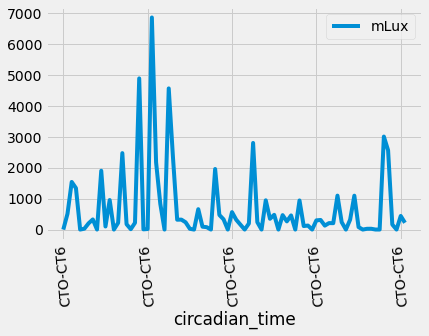

In [42]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

light_df.plot(x ='circadian_time', y='mLux', kind = 'line')
#light_df.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#xlabes = ['date', 'mLux']
plt.xticks(rotation=95)
#light_df.plot(x ='date', y='circadian time', kind = 'line')
plt.xticks(rotation=95)
#flag = 0
#ct_list = ["CTO-CT6","CT6-CT12", "CT12-CT18","CT18-CT24", "CTO-CT6","CT6-CT12", "CT12-CT18","CT18-CT24"]
#for ct in ct_list:
 #   plt.axvline(x=ct, color='k', linestyle='--')
    
plt.show()

In [43]:
# taking the CT12-CT18 data and saving it in the list? dataframe?

light_df.head()
print(light_df)
light_df.to_csv('file_name.csv')

                                       date circadian_time         mLux
0   2022/01/08 00:00:00-2022/01/08 05:00:00        CTO-CT6     0.066667
1   2022/01/08 06:00:00-2022/01/08 11:00:00       CT6-CT12   511.495261
2   2022/01/08 12:00:00-2022/01/08 17:00:00      CT12-CT18  1538.693205
3   2022/01/08 18:00:00-2022/01/08 23:00:00      CT18-CT24  1339.393907
4   2022/02/08 00:00:00-2022/02/08 05:00:00        CTO-CT6     0.000000
..                                      ...            ...          ...
77  2022/08/08 13:00:00-2022/08/08 18:00:00       CT6-CT12  2562.047724
78  2022/08/08 19:00:00-2022/09/08 00:00:00      CT12-CT18   163.215546
79  2022/09/08 01:00:00-2022/09/08 06:00:00      CT18-CT24     0.926991
80  2022/09/08 07:00:00-2022/09/08 12:00:00        CTO-CT6   439.658056
81  2022/09/08 13:00:00-2022/09/08 18:00:00       CT6-CT12   220.187338

[82 rows x 3 columns]


In [44]:
ct_q = "SELECT date,circadian_time, mLux FROM light_df WHERE circadian_time = 'CT12-CT18' GROUP BY date;"

#ct_q = SELECT date, mLux FROM data_light WHERE circadian time = 'CT12-CT18' GROUP BY STRFTIME('%Y-%m-%d %H:00:00', Timestamp)
df_ct = sqldf(ct_q)
df_ct.head()
print(df_ct)
df_ct.to_csv('df_ct.csv')

                                       date circadian_time         mLux
0   2022/01/08 12:00:00-2022/01/08 17:00:00      CT12-CT18  1538.693205
1   2022/02/08 12:00:00-2022/02/08 17:00:00      CT12-CT18   202.362783
2   2022/03/08 12:00:00-2022/03/08 17:00:00      CT12-CT18    99.902190
3   2022/04/08 12:00:00-2022/04/08 17:00:00      CT12-CT18  2469.717667
4   2022/05/08 12:00:00-2022/05/08 17:00:00      CT12-CT18  4883.663683
5   2022/06/08 12:00:00-2022/06/08 17:00:00      CT12-CT18  2171.827486
6   2022/07/08 12:00:00-2022/07/08 17:00:00      CT12-CT18  2339.196989
7   2022/07/20 19:00:00-2022/07/21 00:00:00      CT12-CT18    25.788178
8   2022/07/21 19:00:00-2022/07/22 00:00:00      CT12-CT18    77.530860
9   2022/07/22 19:00:00-2022/07/23 00:00:00      CT12-CT18   330.065021
10  2022/07/23 19:00:00-2022/07/24 00:00:00      CT12-CT18   157.926296
11  2022/07/24 19:00:00-2022/07/25 00:00:00      CT12-CT18   239.569148
12  2022/07/25 19:00:00-2022/07/26 00:00:00      CT12-CT18   476

In [45]:
#combining sleep, activity data and mlux data (taking code from previous file)
#data_sleep = pd.read_excel('T_raw_oura_sleep_copy.xls')
print(data_sleep.columns)

Index(['summary_date', 'period_id', 'is_longest', 'timezone',
       'bedtime_end_dt_adjusted', 'bedtime_start_dt_adjusted',
       'breath_average', 'duration_in_hrs', 'total_in_hrs', 'awake_in_hrs',
       'rem_in_hrs', 'deep_in_hrs', 'light_in_hrs', 'midpoint_time',
       'efficiency', 'restless', 'onset_latency_in_hrs', 'hr_5min',
       'hr_average', 'hr_lowest', 'hypnogram_5min', 'rmssd', 'rmssd_5min',
       'score', 'score_alignment', 'score_deep', 'score_disturbances',
       'score_efficiency', 'score_latency', 'score_rem', 'score_total',
       'temperature_deviation', 'temperature_trend_deviation',
       'bedtime_start_delta', 'bedtime_end_delta', 'midpoint_at_delta',
       'temperature_delta'],
      dtype='object')


In [46]:
data_sleep.head()

,summary_date,period_id,is_longest,timezone,bedtime_end_dt_adjusted,bedtime_start_dt_adjusted,breath_average,duration_in_hrs,total_in_hrs,awake_in_hrs,...,score_efficiency,score_latency,score_rem,score_total,temperature_deviation,temperature_trend_deviation,bedtime_start_delta,bedtime_end_delta,midpoint_at_delta,temperature_delta
0,2022-07-17,0,1,60,2022-07-18 07:25:59+01:00,2022-07-17 21:02:59+01:00,17.500,10.383333,8.933333,1.450000,...,86,99,96,100,0.02,-0.02,-10621,26759,9269,0.02
1,2022-07-18,0,1,60,2022-07-19 07:24:54+01:00,2022-07-18 22:16:54+01:00,17.125,9.133333,8.483333,0.650000,...,98,75,98,98,-0.10,-0.03,-6186,26694,9804,-0.10
2,2022-07-19,0,1,60,2022-07-20 06:51:30+01:00,2022-07-19 22:28:30+01:00,17.375,8.383333,7.575000,0.808333,...,95,97,80,91,-0.36,-0.19,-5490,24690,9900,-0.36
3,2022-07-20,1,1,60,2022-07-21 07:26:21+01:00,2022-07-20 22:22:21+01:00,17.125,9.066667,8.500000,0.566667,...,99,72,88,98,-0.25,-0.29,-5859,26781,10101,-0.25
4,2022-07-21,1,1,60,2022-07-22 07:22:51+01:00,2022-07-21 22:01:51+01:00,16.875,9.350000,8.400000,0.950000,...,95,56,94,97,-0.07,-0.23,-7089,26571,10161,-0.07


In [47]:
data_act = pd.DataFrame()
#oura file with activity data
data_acti = pd.read_csv('T_raw_oura_activity copy.csv')
print(data_acti.columns)

Index(['summary_date', 'timezone', 'day_start_dt_adjusted',
       'day_end_dt_adjusted', 'cal_active', 'cal_total', 'class_5min', 'steps',
       'daily_movement', 'non_wear', 'rest', 'inactive', 'low', 'medium',
       'high', 'inactivity_alerts', 'average_met', 'met_1min',
       'met_min_inactive', 'met_min_low', 'met_min_medium', 'met_min_high',
       'target_calories', 'target_km', 'target_miles', 'to_target_km',
       'to_target_miles', 'score', 'score_meet_daily_targets',
       'score_move_every_hour', 'score_recovery_time', 'score_stay_active',
       'score_training_frequency', 'score_training_volume', 'rest_mode_state',
       'total'],
      dtype='object')


In [48]:
#query to get the data for just two days 20 and 21st

#data_sleep['bedtime_end_dt_adjusted'] = data_sleep['bedtime_end_dt_adjusted'].astype('datetime64').astype(int).astype(float)
#data_sleep['bedtime_start_dt_adjusted'] = data_sleep['bedtime_start_dt_adjusted'].astype('datetime64').astype(int).astype(float)
#print(data_sleep.dtypes)
sleep_q = "SELECT summary_date, total_in_hrs, restless FROM data_sleep WHERE  `summary_date` >= '2022-07-20' AND `summary_date` < '2022-08-09' GROUP BY summary_date";
#summary_date, total_in_hrs, -> sleep data
#met, steps -> activity data

#query_sleep = sqldf(sleep_q)
#query_sleep.head()

acti_q = "SELECT summary_date, average_met,steps FROM data_acti WHERE  `summary_date` >= '2022-07-20' AND `summary_date` < '2022-08-09' GROUP BY summary_date";

df_acti = sqldf(acti_q)
df_acti.head()

df_sleep = sqldf(sleep_q)
df_sleep.head()
print(df_acti)
#print(type(query_acti))
#print("Hiii")
#print(type(query_sleep))
print(df_sleep)

#sleep_newdf = pd.DataFrame(acti_q, columns=['summary_date', 'average_met'])
#print(type(query_acti))
#print(sleep_newdf)

   summary_date  average_met  steps
0    2022-07-20      1.40625   9068
1    2022-07-21      2.50000   8618
2    2022-07-22      2.03125  18070
3    2022-07-23      1.37500   9953
4    2022-07-24      1.68750  20525
5    2022-07-25      1.81250  10050
6    2022-07-26      1.93750  12143
7    2022-07-27      1.50000   2897
8    2022-07-28      2.06250  15117
9    2022-07-29      1.28125   5608
10   2022-07-30      1.78125   9262
11   2022-07-31      1.18750   2198
12   2022-08-01      2.53125  19531
13   2022-08-02      1.40625   5044
14   2022-08-03      1.62500   7184
15   2022-08-04      1.34375   6905
16   2022-08-05      1.87500  25669
17   2022-08-06      1.46875   7318
18   2022-08-07      1.46875   9452
19   2022-08-08      1.31250   6579
   summary_date  total_in_hrs  restless
0    2022-07-20      8.500000        14
1    2022-07-21      8.400000        18
2    2022-07-22      7.633333        18
3    2022-07-23      8.833333        13
4    2022-07-24      8.533333        16
5   

In [49]:
#combining dataframes to make one frame
df_sleep['summary_date'] = data_sleep['summary_date'].astype('datetime64').astype(int).astype(float)
avg_met = df_acti["average_met"]
avg_met.head()
steps = df_acti["steps"]
steps.head()

mLux = df_ct["mLux"]
bedtimeStart = data_sleep['bedtime_start_dt_adjusted'].astype('datetime64').astype(int).astype(float)
bedtimeEnd = data_sleep['bedtime_start_dt_adjusted'].astype('datetime64').astype(int).astype(float)

df_sleep.insert(2,"steps",steps,False)
df_sleep.insert(3,"average_met",avg_met,False)
df_sleep.insert(4,"mLux",mLux,False)
#added on 23-08-22
df_sleep.insert(5,"bedtimeStart",bedtimeStart,False)
df_sleep.insert(6,"bedtimeEnd",bedtimeEnd,False)

df_sleep.head()
df_sleep.to_csv('df_sleep.csv', index=False)

In [55]:
#print(type(df_sleep))
#df_sleep.describe()
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   summary_date  19 non-null     float64
 1   total_in_hrs  19 non-null     float64
 2   steps         19 non-null     int64  
 3   average_met   19 non-null     float64
 4   mLux          19 non-null     float64
 5   bedtimeStart  19 non-null     float64
 6   bedtimeEnd    19 non-null     float64
 7   restless      19 non-null     int64  
dtypes: float64(6), int64(2)
memory usage: 1.3 KB


In [22]:
#Formatting summary_date column to float to work with regression model
#data_sleep['summary_date'] = data_sleep['summary_date'].astype('datetime64').astype(int).astype(float)

#df_sleep['summary_date'] = df_sleep['summary_date'].dt.date
#df_sleep['summary_date'] = data_sleep['summary_date'].astype('datetime64').astype(int).astype(float)
#data_sleep['bedtime_start_dt_adjusted'] = data_sleep['bedtime_start_dt_adjusted'].astype('datetime64').astype(int).astype(float)
#print(df_sleep.dtypes)

#df_sleep['summary_date'] = data_sleep['summary_date'].astype('datetime64').astype(int).astype(float)

In [23]:
#the random forest starts--
#Features and Targets and Convert Data to Arrays
# Labels are the values we want to predict
# Use numpy to convert to arrays
import numpy as np
labels = np.array(df_sleep['total_in_hrs'])

# Remove the labels from the features
# axis 1 refers to the columns
df_sleep= df_sleep.drop('total_in_hrs', axis = 1)

# Saving feature names for later use
# data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
feature_list = list(df_sleep.columns)

# Convert to numpy array
df_sleep = np.array(df_sleep)
print(feature_list)

['summary_date', 'steps', 'average_met', 'mLux', 'bedtimeStart', 'bedtimeEnd', 'restless']


In [24]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(df_sleep, labels, test_size = 0.25, random_state = 42)

In [25]:
#testing if training and split is done correctly
#expect the training features number of columns to match the testing feature number of columns and the number of rows to match for the respective training and testing features and the labels
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (14, 7)
Training Labels Shape: (14,)
Testing Features Shape: (5, 7)
Testing Labels Shape: (5,)


In [26]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [27]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'hours.')
#Mean Absolute Error: 0.46 hours.

Mean Absolute Error: 0.46 hours.


In [28]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
#Accuracy: 93.9 %.

Accuracy: 93.9 %.


In [29]:
print(rf.feature_importances_)

[0.0967215  0.12527223 0.24948155 0.19938981 0.08795432 0.10166645
 0.13951413]


In [30]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: average_met          Importance: 0.25
Variable: mLux                 Importance: 0.2
Variable: restless             Importance: 0.14
Variable: steps                Importance: 0.13
Variable: summary_date         Importance: 0.1
Variable: bedtimeEnd           Importance: 0.1
Variable: bedtimeStart         Importance: 0.09


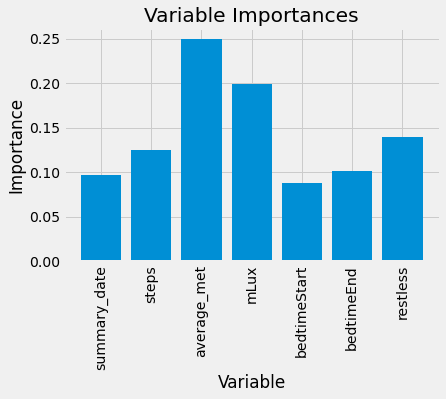

In [31]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');